## Importiing libraries

In [1]:
import numpy as np
import os
import cv2
import tensorflow as tf
from tensorflow import keras

In [2]:
img_dir = "./cell_images/cell_images"
#uninfected = "./cell_images/Uninfected"
#parasitized = "./cell_images/parasitized"
classes = os.listdir(img_dir)
print(classes)

['Parasitized', 'Uninfected']


## Generating the training and validation dataset from the image files

In [3]:
size = 64
batch_size = 48
training_data = keras.preprocessing.image_dataset_from_directory(img_dir,
                                                                seed = 45,
                                                                validation_split = 0.2,
                                                                subset = "training",
                                                                image_size = (size,size),
                                                                batch_size = batch_size)

validation_data = keras.preprocessing.image_dataset_from_directory(img_dir,
                                                                seed = 45,
                                                                validation_split = 0.2,
                                                                subset = "validation",
                                                                image_size = (size,size),
                                                                batch_size = batch_size)


test_data = keras.preprocessing.image_dataset_from_directory(img_dir,
                                                                seed = 45,
                                                                validation_split = 0.2,
                                                                subset = "validation",
                                                                image_size = (size,size),
                                                                batch_size = batch_size)

Found 27558 files belonging to 2 classes.
Using 22047 files for training.
Found 27558 files belonging to 2 classes.
Using 5511 files for validation.
Found 27558 files belonging to 2 classes.
Using 5511 files for validation.


## Plotting the images

Image shape: (118, 139, 3)


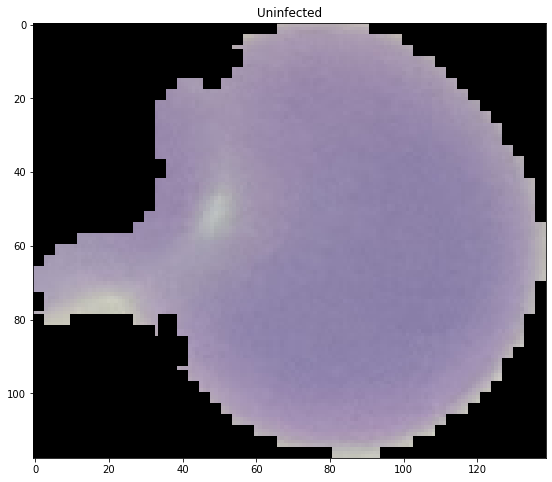

In [4]:
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.figure(figsize = (12,8))
def view_images(target_dir, target_class):
    target_folder = target_dir + target_class
    
    random_image = random.sample(os.listdir(target_folder), 1)
    
    img = mpimg.imread(target_folder + '/' + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    
    print(f"Image shape: {img.shape}")
    return img
uninfected_images = view_images('./cell_images/cell_images/', 'Uninfected')

Image shape: (124, 115, 3)


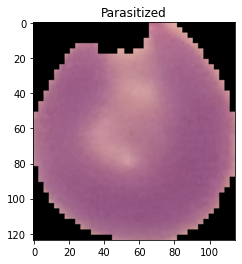

In [5]:
parasitized_images = view_images('./cell_images/cell_images/', 'Parasitized')

## Creating the CNN architecture

In [6]:
from tensorflow.keras.layers import Flatten, Conv2D, Dropout, BatchNormalization, MaxPool2D, Dense

In [7]:
input = keras.layers.Input(shape = (64,64,3))
data_aug = keras.layers.experimental.preprocessing.Rescaling(1./255)(input)
conv1 = Conv2D(32, kernel_size = 3, activation = "relu")(data_aug)
pool1 = MaxPool2D(2)(conv1)
norm1 = BatchNormalization(axis = -1)(pool1)
drop1 = Dropout(0.2)(norm1)

conv2 = Conv2D(32, kernel_size = 3, activation = "relu")(drop1)
pool2 = MaxPool2D(2)(conv2)
norm2 = BatchNormalization(axis = -1)(pool2)
drop2 = Dropout(0.2)(norm2)

flatten = Flatten()(drop2)

hidden1 = Dense(512, activation = "relu")(flatten)
norm3 = BatchNormalization(axis = -1)(hidden1)
drop3 = Dropout(0.2)(norm3)

hidden2 = Dense(512, activation = "relu")(drop3)
norm4 = BatchNormalization(axis = -1)(hidden2)
drop4 = Dropout(0.2)(norm4)

output = Dense(2, activation = "sigmoid")(drop4)

model = keras.Model(inputs = input, outputs = output)

In [8]:
model.compile(optimizer = "Adam",
             loss = "sparse_categorical_crossentropy",
             metrics = ["accuracy"])
print(model.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
rescaling (Rescaling)        (None, 64, 64, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 31, 31, 32)        128       
_________________________________________________________________
dropout (Dropout)            (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        9248  

In [9]:
%%time
history = model.fit(training_data, epochs = 10, validation_data = validation_data, verbose = True)

Epoch 1/10
460/460 [==============================] - 268s 574ms/step - loss: 0.7042 - accuracy: 0.7025 - val_loss: 2.5546 - val_accuracy: 0.5117
Epoch 2/10
460/460 [==============================] - 191s 414ms/step - loss: 0.2507 - accuracy: 0.9074 - val_loss: 0.2355 - val_accuracy: 0.9066
Epoch 3/10
460/460 [==============================] - 182s 394ms/step - loss: 0.1966 - accuracy: 0.9274 - val_loss: 0.3004 - val_accuracy: 0.9036
Epoch 4/10
460/460 [==============================] - 197s 428ms/step - loss: 0.1666 - accuracy: 0.9406 - val_loss: 0.2602 - val_accuracy: 0.9196
Epoch 5/10
460/460 [==============================] - 186s 404ms/step - loss: 0.1465 - accuracy: 0.9473 - val_loss: 0.1633 - val_accuracy: 0.9405
Epoch 6/10
460/460 [==============================] - 154s 334ms/step - loss: 0.1312 - accuracy: 0.9536 - val_loss: 0.2108 - val_accuracy: 0.9231
Epoch 7/10
460/460 [==============================] - 176s 383ms/step - loss: 0.1248 - accuracy: 0.9568 - val_loss: 0.1749 -

In [10]:
def plot_loss(history):

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    epochs = range(len(history.history['loss']))

    # plot loss
    plt.plot(epochs, loss, label='Training Loss')
    plt.plot(epochs, val_loss, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.title('Loss')
    plt.legend()

    plt.figure()
    plt.plot(epochs, accuracy, label='Training Accuracy')
    plt.plot(epochs, val_accuracy, label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.title('Accuracy')
    plt.legend()

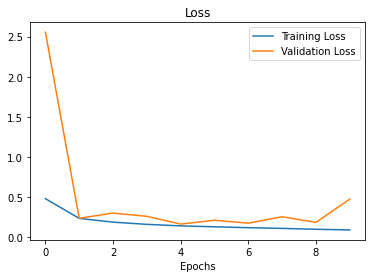

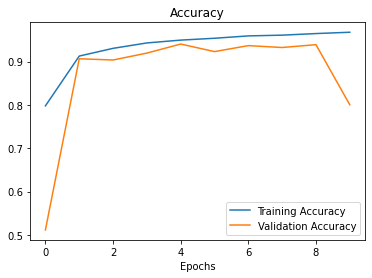

In [11]:
plot_loss(history)

In [12]:
pred = model.evaluate(validation_data)

115/115 [==============================] - 12s 102ms/step - loss: 0.4741 - accuracy: 0.8004


In [14]:
tf.keras.models.save_model(model,'my_model.h5')

In [15]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [16]:
model = load_model('my_model.h5')

In [17]:
img=image.load_img('./cell_images/Parasitized/1.png',target_size=(64,64))

In [18]:
x = image.img_to_array(img)
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [19]:
import numpy as np
x = x/255
x=np.expand_dims(x,axis=0)
#img_data=preprocess_input(x)
x.shape


(1, 64, 64, 3)

In [20]:
model.predict(x)

array([[0.80079967, 0.2821847 ]], dtype=float32)

In [21]:
a=np.argmax(model.predict(x), axis=1)

In [24]:
a

array([0], dtype=int64)

In [23]:
if(a==1):
    print("Uninfected")
else:
    print("Parasitized")

Parasitized
